# Исследование объявлений о продаже квартир

В моем распоряжении архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Необходимо определить параметры, оказывающие наибольшее влияние на оценку стоимости недвижимости.

In [1]:
import pandas as pd
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
real_estate = pd.read_csv('C:\\Users\\yansa\\YP_Projects\\YP_DataSets\\SP2\\real_estate_data.csv', sep = '\t')
real_estate.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В предоставленных данных 22 колонки, содержащие 4 типа. Только в 8ми колонках информация заполнена полностью, в остальных есть отсутствующая информация в разных объемах. Например, в колонке is_apartment заполнены лишь 2775 строк из 23699. Типы данных верные, за исключением first_day_exposition - его нужно перевести в формат datetime.

### Предобработка данных

In [4]:
display(real_estate.duplicated().sum())

0

In [5]:
display('ceiling_height', real_estate['ceiling_height'].sort_values().unique())
display('floors_total', real_estate['floors_total'].sort_values().unique())
display('living_area', real_estate['living_area'].sort_values().unique())
display('is_apartment', real_estate['is_apartment'].sort_values().unique())
display('kitchen_area', real_estate['kitchen_area'].sort_values().unique())
display('balcony', real_estate['balcony'].sort_values().unique())
display('locality_name', real_estate['locality_name'].sort_values().unique())
display('airports_nearest', real_estate['airports_nearest'].sort_values().unique())
display('cityCenters_nearest', real_estate['cityCenters_nearest'].sort_values().unique())
display('parks_around3000', real_estate['parks_around3000'].sort_values().unique())
display('parks_nearest', real_estate['parks_nearest'].sort_values().unique())
display('ponds_around3000', real_estate['ponds_around3000'].sort_values().unique())
display('ponds_nearest', real_estate['ponds_nearest'].sort_values().unique())
display('days_exposition', real_estate['days_exposition'].sort_values().unique())

'ceiling_height'

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

'floors_total'

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 34., 35., 36., 37., 52., 60., nan])

'living_area'

array([  2. ,   3. ,   5. , ..., 409. , 409.7,   nan])

'is_apartment'

array([False, True, nan], dtype=object)

'kitchen_area'

array([  1.3 ,   2.  ,   2.3 ,   2.4 ,   2.89,   3.  ,   3.2 ,   3.3 ,
         3.4 ,   3.5 ,   3.7 ,   3.8 ,   4.  ,   4.1 ,   4.2 ,   4.3 ,
         4.4 ,   4.5 ,   4.6 ,   4.7 ,   4.8 ,   4.9 ,   5.  ,   5.04,
         5.06,   5.1 ,   5.14,   5.2 ,   5.21,   5.23,   5.25,   5.28,
         5.29,   5.3 ,   5.31,   5.33,   5.35,   5.4 ,   5.42,   5.44,
         5.47,   5.49,   5.5 ,   5.53,   5.59,   5.6 ,   5.61,   5.62,
         5.64,   5.65,   5.68,   5.7 ,   5.74,   5.75,   5.78,   5.8 ,
         5.82,   5.85,   5.86,   5.9 ,   5.91,   6.  ,   6.02,   6.03,
         6.1 ,   6.16,   6.19,   6.2 ,   6.22,   6.23,   6.24,   6.25,
         6.26,   6.27,   6.28,   6.3 ,   6.31,   6.33,   6.35,   6.36,
         6.37,   6.4 ,   6.47,   6.5 ,   6.55,   6.58,   6.6 ,   6.61,
         6.62,   6.65,   6.7 ,   6.72,   6.73,   6.76,   6.77,   6.8 ,
         6.82,   6.83,   6.84,   6.86,   6.9 ,   6.91,   6.93,   6.95,
         7.  ,   7.02,   7.03,   7.06,   7.09,   7.1 ,   7.12,   7.15,
      

'balcony'

array([ 0.,  1.,  2.,  3.,  4.,  5., nan])

'locality_name'

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

'airports_nearest'

array([    0.,  6450.,  6914., ..., 84853., 84869.,    nan])

'cityCenters_nearest'

array([  181.,   208.,   215., ..., 65952., 65968.,    nan])

'parks_around3000'

array([ 0.,  1.,  2.,  3., nan])

'parks_nearest'

array([1.000e+00, 3.000e+00, 4.000e+00, 7.000e+00, 9.000e+00, 1.000e+01,
       1.100e+01, 1.200e+01, 1.300e+01, 1.400e+01, 1.500e+01, 1.600e+01,
       1.700e+01, 1.800e+01, 1.900e+01, 2.000e+01, 2.100e+01, 2.200e+01,
       2.300e+01, 2.400e+01, 2.700e+01, 2.800e+01, 3.000e+01, 3.200e+01,
       3.300e+01, 3.400e+01, 3.500e+01, 3.600e+01, 3.700e+01, 3.800e+01,
       3.900e+01, 4.000e+01, 4.100e+01, 4.200e+01, 4.300e+01, 4.400e+01,
       4.500e+01, 4.600e+01, 4.700e+01, 4.800e+01, 4.900e+01, 5.000e+01,
       5.100e+01, 5.200e+01, 5.300e+01, 5.400e+01, 5.500e+01, 5.600e+01,
       5.700e+01, 5.800e+01, 5.900e+01, 6.000e+01, 6.100e+01, 6.200e+01,
       6.300e+01, 6.400e+01, 6.500e+01, 6.600e+01, 6.700e+01, 6.800e+01,
       6.900e+01, 7.100e+01, 7.200e+01, 7.300e+01, 7.400e+01, 7.500e+01,
       7.600e+01, 7.700e+01, 7.800e+01, 8.000e+01, 8.100e+01, 8.200e+01,
       8.300e+01, 8.400e+01, 8.500e+01, 8.600e+01, 8.700e+01, 8.800e+01,
       9.000e+01, 9.100e+01, 9.200e+01, 9.300e+01, 

'ponds_around3000'

array([ 0.,  1.,  2.,  3., nan])

'ponds_nearest'

array([  13.,   16.,   19., ..., 1341., 1344.,   nan])

'days_exposition'

array([1.000e+00, 2.000e+00, 3.000e+00, ..., 1.572e+03, 1.580e+03,
             nan])

In [6]:
display(real_estate['balcony'].isna().sum())
real_estate['balcony'].fillna(0, inplace = True)
display(real_estate['balcony'].isna().sum(), real_estate['balcony'].sort_values().unique())

11519

0

array([0., 1., 2., 3., 4., 5.])

In [7]:
display(real_estate[real_estate['parks_around3000'].isna() == True]['parks_nearest'].unique())
display(real_estate[real_estate['ponds_around3000'].isna() == True]['ponds_nearest'].unique())

array([nan])

array([nan])

In [8]:
real_estate['first_day_exposition'] = pd.to_datetime(real_estate['first_day_exposition'])

In [9]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

Дубликатов в данных не обнаружено. 

После анализа пропущенных значений, принято решение заполнить пропущенные значения в колонке balcony, в остальных данных нет возможности заполнить по средним, медианным или типичным значениям. Хотел заполнить пропущенные значения в колонках parks_around3000 и ponds_around3000 нулями, в случае, если в колонках parks_nearest и ponds_nearest расстояние будет превышать 3км, но в этих строках также отсутсвуют значения. 

Что касается причины пропуска значений, которые заполнялись пользователями: скорее всего считали что основной информации достаточно и посчитали что детально заполнять не надо. Высоту потолков могли умолчать в случае с низкими потолками, чтобы не отпугнуть потенциальных интересантов. По данным, которые заполняются авоматически: возможен сбой автозаполнения или недостаток данных о геопозиции. Например, в объявлении отсутствует геопозиция, и автоматом вычислить расстояние до ближайшего аэропорта/парка/пруда нет возможности, так как нет исходной точки отсчета. 

Тип данных был изменен только в колонке first_day_exposition, для удоства в дальнейшей работе с датами.

### Дополняю таблицу данными
- цена квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [10]:
real_estate['price_per_meter'] = (real_estate['last_price'] / real_estate['total_area']).astype('int64')
real_estate['weekday_exposition'] = real_estate['first_day_exposition'].dt.weekday
real_estate['month_exposition'] = real_estate['first_day_exposition'].dt.month
real_estate['year_exposition'] = real_estate['first_day_exposition'].dt.year

In [11]:
def floor_type(row):
    fl = row['floor']
    fl_ttl = row['floors_total']
    if fl == 1:
        return 'Первый'
    elif fl_ttl == fl:
        return 'Последний'
    else:
        return 'Другой'
    
real_estate['floor_type'] = real_estate.apply(floor_type, axis = 1)

In [12]:
real_estate[real_estate['floor_type'] == 'Последний'][['floor', 'floors_total', 'floor_type']]

,floor,floors_total,floor_type
12,5,5.0,Последний
13,5,5.0,Последний
23,9,9.0,Последний
36,9,9.0,Последний
43,4,4.0,Последний
...,...,...,...
23641,5,5.0,Последний
23644,4,4.0,Последний
23648,5,5.0,Последний
23660,3,3.0,Последний


In [13]:
real_estate['area_ratio_living_total'] = real_estate['living_area'] / real_estate['total_area']
real_estate['area_ratio_kitchen_total'] = real_estate['kitchen_area'] / real_estate['total_area']

In [14]:
display(real_estate.head(5))
real_estate.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_type,area_ratio_living_total,area_ratio_kitchen_total
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,2.0,755.0,NaN,120370,3,3,2019,Другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,0.0,NaN,81.0,82920,1,12,2018,Первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,2.0,574.0,558.0,92785,3,8,2015,Другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,3.0,234.0,424.0,408176,4,7,2015,Другой,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,1.0,48.0,121.0,100000,1,6,2018,Другой,0.320000,0.410000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   total_images              23699 non-null  int64         
 1   last_price                23699 non-null  float64       
 2   total_area                23699 non-null  float64       
 3   first_day_exposition      23699 non-null  datetime64[ns]
 4   rooms                     23699 non-null  int64         
 5   ceiling_height            14504 non-null  float64       
 6   floors_total              23613 non-null  float64       
 7   living_area               21796 non-null  float64       
 8   floor                     23699 non-null  int64         
 9   is_apartment              2775 non-null   object        
 10  studio                    23699 non-null  bool          
 11  open_plan                 23699 non-null  bool          
 12  kitchen_area      

### Исследовательский анализ данных

Изучаю параметры: площадь, цена, число комнат, высота потолков.

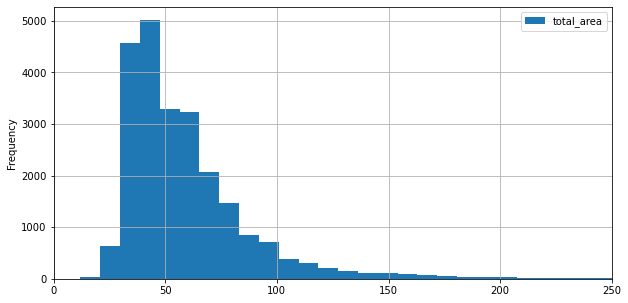

In [15]:
real_estate['total_area'].plot(kind = 'hist', bins = 100,figsize = (10,5), legend = True, grid = True, xlim = (0,250));

In [16]:
real_estate['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [17]:
real_estate.query('last_price < 400000')['last_price']

8793    12190.0
Name: last_price, dtype: float64

In [18]:
display(real_estate.query('last_price < 400000')['last_price'].count())
real_estate = real_estate.query('last_price > 400000')

1

In [19]:
display(real_estate.query('last_price > 150000000')['last_price'].count())
real_estate = real_estate.query('last_price < 150000000')

15

In [20]:
real_estate['last_price_mln'] = real_estate['last_price'] / 1000000

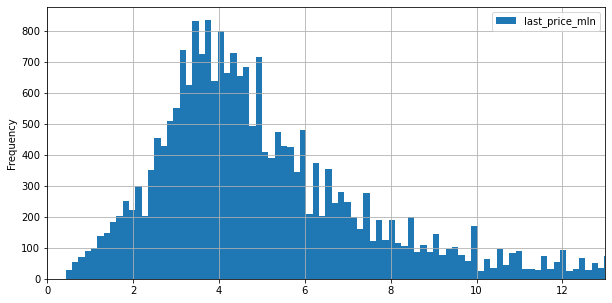

In [21]:
real_estate['last_price_mln'].plot(kind = 'hist', bins = 1000,figsize = (10,5), legend = True, grid = True, xlim = (0, 13));

In [22]:
real_estate['last_price_mln'].describe()

count    23681.000000
mean         6.355507
std          7.350474
min          0.430000
25%          3.400000
50%          4.650000
75%          6.790000
max        148.000000
Name: last_price_mln, dtype: float64

In [23]:
real_estate['price_per_meter_k'] = real_estate['price_per_meter'] / 1000

In [24]:
real_estate[real_estate['price_per_meter_k'] < 12][['total_area', 'locality_name', 'price_per_meter_k']]

,total_area,locality_name,price_per_meter_k
4405,52.0,Сланцы,9.615
5698,42.0,городской посёлок Будогощь,10.714
7962,46.2,Луга,11.904
9471,78.0,Гатчина,10.897
9581,43.4,деревня Старополье,10.368
10595,63.0,Сланцы,11.587
11351,54.0,Сланцы,10.185
14911,54.0,посёлок станции Свирь,7.962
15969,54.0,Сланцы,10.925
16219,38.5,деревня Вахнова Кара,11.688


In [25]:
real_estate[real_estate['price_per_meter_k'] > 400]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_type,area_ratio_living_total,area_ratio_kitchen_total,last_price_mln,price_per_meter_k
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,424.0,408176,4,7,2015,Другой,NaN,NaN,64.90,408.176
492,18,95000000.0,216.0,2017-12-05,4,3.00,5.0,86.0,4,NaN,...,14.0,439814,1,12,2017,Другой,0.398148,0.356481,95.00,439.814
793,20,135000000.0,310.0,2018-05-22,4,3.30,5.0,250.0,2,NaN,...,342.0,435483,1,5,2018,Другой,0.806452,0.161290,135.00,435.483
1188,20,118000000.0,290.6,2018-06-01,6,3.82,6.0,188.7,3,NaN,...,316.0,406056,4,6,2018,Другой,0.649346,0.075705,118.00,406.056
1300,14,120000000.0,280.0,2018-07-12,5,4.70,4.0,162.0,3,NaN,...,225.0,428571,3,7,2018,Другой,0.578571,0.107143,120.00,428.571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21923,10,115490000.0,235.0,2017-04-09,5,4.90,5.0,140.0,5,NaN,...,351.0,491446,6,4,2017,Последний,0.595745,0.212766,115.49,491.446
22229,16,148000000.0,256.0,2016-03-16,5,NaN,6.0,179.0,5,NaN,...,233.0,578125,2,3,2016,Другой,0.699219,0.140625,148.00,578.125
22709,20,59000000.0,127.5,2016-12-21,4,3.00,12.0,85.0,8,NaN,...,635.0,462745,2,12,2016,Другой,0.666667,0.101961,59.00,462.745
22869,0,15000000.0,25.0,2018-07-25,1,100.00,5.0,14.0,5,True,...,19.0,600000,2,7,2018,Последний,0.560000,0.440000,15.00,600.000


In [26]:
display(real_estate.query('price_per_meter_k > 400')['price_per_meter_k'].count())
real_estate = real_estate.query('price_per_meter_k < 400')

62

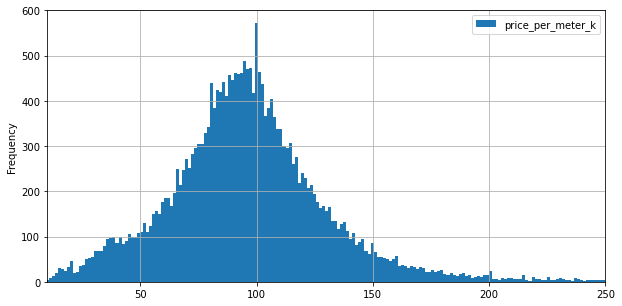

In [27]:
real_estate['price_per_meter_k'].plot(kind = 'hist', bins = 300,figsize = (10,5), legend = True, grid = True, 
xlim = (10, 250));

In [28]:
real_estate['price_per_meter_k'].describe().astype('int64')

count    23618
mean        97
std         38
min          7
25%         76
50%         94
75%        113
max        399
Name: price_per_meter_k, dtype: int64

In [29]:
display(real_estate[real_estate['rooms'] == 0]['rooms'].count())
real_estate['rooms'] = real_estate['rooms'].where(real_estate['rooms'] > 0, 1)

197

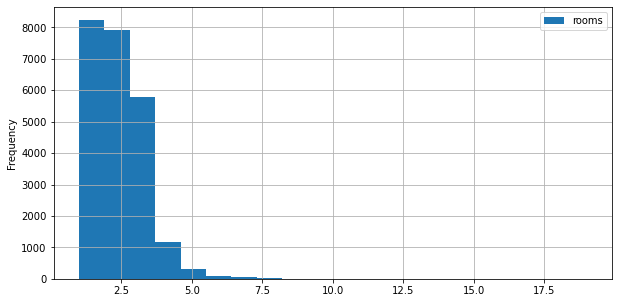

In [30]:
real_estate['rooms'].plot(kind = 'hist', bins = 20,figsize = (10,5), legend = True, grid = True);

In [31]:
real_estate['rooms'].describe()

count    23618.000000
mean         2.073376
std          1.058116
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [32]:
display(real_estate[real_estate['ceiling_height'] > 4]['ceiling_height'].count())
display(real_estate[real_estate['ceiling_height'] < 2.2]['ceiling_height'].count())
real_estate['ceiling_height'] = real_estate['ceiling_height'].where(real_estate['ceiling_height'] < 4, 2.77)
real_estate['ceiling_height'] = real_estate['ceiling_height'].where(real_estate['ceiling_height'] > 2.2, 2.77)

69

14

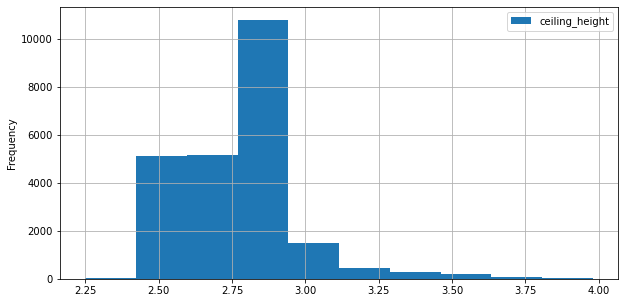

In [33]:
real_estate['ceiling_height'].plot(kind = 'hist', bins = 10,figsize = (10,5), legend = True, grid = True);

In [34]:
real_estate['ceiling_height'].describe()

count    23618.000000
mean         2.737416
std          0.194044
min          2.250000
25%          2.600000
50%          2.770000
75%          2.770000
max          3.980000
Name: ceiling_height, dtype: float64

Больше всего объявлений размещены на недвижимость площадью от 40 до 70 м2. Последняя цена большинства объявлений от 3,4 до 6,8 млн. руб. Средняя стоимость квадратного метра 97тыс.руб., большинство значений расположены в интервале от 76 до 113 тысяч рублей. Больше всего объявлений на однокомнатные и двухкомнатные квартиры, ненамного меньше объявлений на трехкомнатные квартиры (~20%). 2,7м - средняя высота потолков.

### Изучаю время продажи квартиры

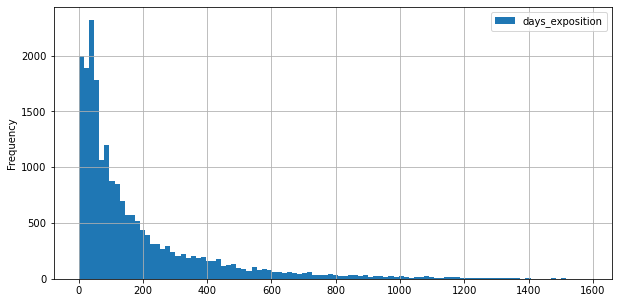

In [35]:
real_estate['days_exposition'].plot(kind = 'hist', bins = 100,figsize = (10,5), legend = True, grid = True);

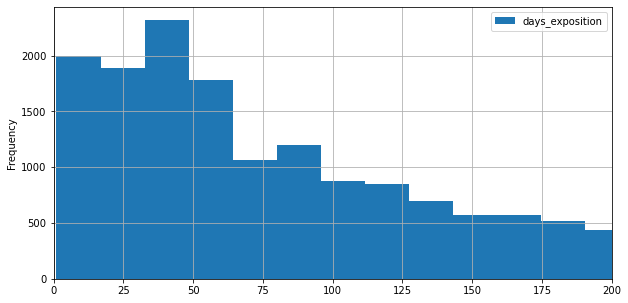

In [36]:
real_estate['days_exposition'].plot(kind = 'hist', bins = 100,figsize = (10,5), legend = True, grid = True, xlim = (0, 200));

In [37]:
real_estate['days_exposition'].describe()

count    20453.000000
mean       180.521488
std        219.506330
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее значение: 180 дней, медиана: 95 дней, половина всех объявлений размещены в интервале от 45 до 230 дней. Очень быстрой продажей можно считать продажу в течении 45 дней, необычно долгой свыше 230 дней.

### Убераю редкие и выбивающиеся значения

In [38]:
real_estate.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_per_meter',
       'weekday_exposition', 'month_exposition', 'year_exposition',
       'floor_type', 'area_ratio_living_total', 'area_ratio_kitchen_total',
       'last_price_mln', 'price_per_meter_k'],
      dtype='object')

In [39]:
display(real_estate[real_estate['area_ratio_living_total'] < real_estate['area_ratio_kitchen_total']]['area_ratio_living_total']
.count())
display(real_estate[real_estate['area_ratio_living_total'] < real_estate['area_ratio_kitchen_total']][['total_area', 
'living_area', 'kitchen_area', 'area_ratio_living_total', 'area_ratio_kitchen_total']].head(5))

def area_correction(row):
    kitchen = row['kitchen_area']
    living = row['living_area']
    if living < kitchen:
        return kitchen

real_estate['living_area'] = real_estate.apply(area_correction, axis = 1)
real_estate['area_ratio_living_total'] = real_estate['living_area'] / real_estate['total_area']

display(real_estate[real_estate['area_ratio_living_total'] < real_estate['area_ratio_kitchen_total']]['area_ratio_living_total']
.count())
display(real_estate.loc[4:6][['total_area', 
'living_area', 'kitchen_area', 'area_ratio_living_total', 'area_ratio_kitchen_total']])

348

,total_area,living_area,kitchen_area,area_ratio_living_total,area_ratio_kitchen_total
4,100.0,32.0,41.0,0.320000,0.410000
6,37.3,10.6,14.4,0.284182,0.386059
51,161.0,38.0,50.0,0.236025,0.310559
53,39.1,15.4,15.5,0.393862,0.396419
101,37.0,12.0,13.0,0.324324,0.351351


0

,total_area,living_area,kitchen_area,area_ratio_living_total,area_ratio_kitchen_total
4,100.0,41.0,41.0,0.410000,0.410000
5,30.4,NaN,9.1,NaN,0.299342
6,37.3,14.4,14.4,0.386059,0.386059


In [40]:
real_estate['area_ratio_living_total'].describe()

count    348.000000
mean       0.428497
std        0.073471
min        0.126289
25%        0.378834
50%        0.420340
75%        0.475041
max        0.739837
Name: area_ratio_living_total, dtype: float64

In [41]:
real_estate[real_estate['area_ratio_living_total'] < 0.25]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_type,area_ratio_living_total,area_ratio_kitchen_total,last_price_mln,price_per_meter_k
13915,20,6350000.0,52.0,2018-02-06,2,3.0,6.0,9.0,2,NaN,...,91.0,122115,1,2,2018,Другой,0.173077,0.173077,6.35,122.115
21943,15,6100000.0,77.6,2019-02-28,4,2.5,9.0,9.8,1,NaN,...,33.0,78608,3,2,2019,Первый,0.126289,0.126289,6.10,78.608


In [42]:
real_estate[real_estate['living_area'] < 10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_type,area_ratio_living_total,area_ratio_kitchen_total,last_price_mln,price_per_meter_k
13915,20,6350000.0,52.0,2018-02-06,2,3.0,6.0,9.0,2,NaN,...,91.0,122115,1,2,2018,Другой,0.173077,0.173077,6.35,122.115
21943,15,6100000.0,77.6,2019-02-28,4,2.5,9.0,9.8,1,NaN,...,33.0,78608,3,2,2019,Первый,0.126289,0.126289,6.10,78.608


In [43]:
real_estate['airports_nearest'].describe()

count    18079.000000
mean     28802.489739
std      12653.626106
min          0.000000
25%      18551.500000
50%      26752.000000
75%      37313.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [44]:
display(real_estate.query('airports_nearest == 0')['airports_nearest'].count())
real_estate = real_estate.query('airports_nearest > 0')

1

In [45]:
real_estate['airports_nearest'].describe()

count    18078.000000
mean     28804.082974
std      12652.162534
min       6450.000000
25%      18553.250000
50%      26752.000000
75%      37313.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Было исключено объявление со стоимостью 12190руб. и исключены объявления с ценой свыше 150млн. и стоимостью свыше 400 тысяч руб. за квадратный метр, так как они сильно влияли на среднюю цену. Также в тех объявлениях, где кол-во комнат было 0, значение заменено на 1. Объявления с высотой потолков меньше 2,2м и свыше 4м, были заменены на среднее значение (2,77м).

В 354 объявлениях было обнаружено, что площадь кухни была больше жилой площади, в этих объявлениях значения жилой площади были приравнены к значениям площади кухни. Также было найдено одно объявление, где расстояние до аэропорта было равно 0, оно было исключено.

### Определяю какие факторы больше всего влияют на стоимость квартиры

In [46]:
real_estate_corr = real_estate.corr()
real_estate_corr = real_estate_corr.replace(1,0)

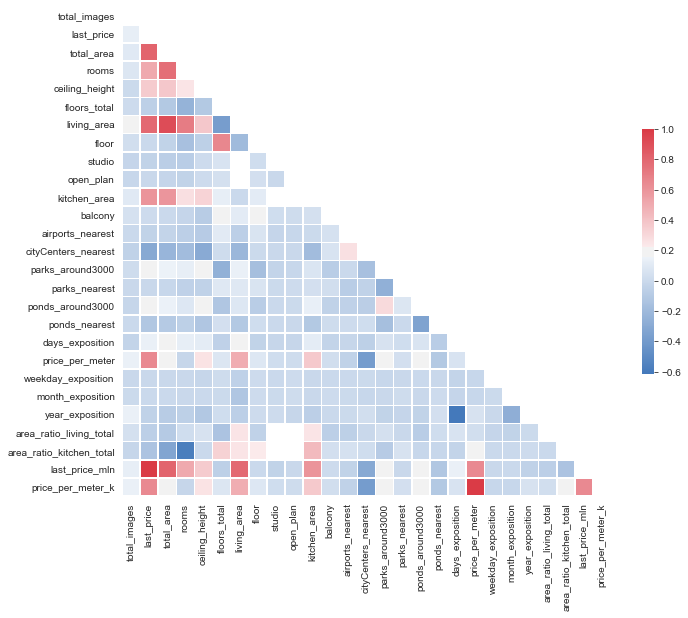

In [47]:
#Источник: https://stackoverflow.com/questions/39409866/correlation-heatmap
def CorrMtx(df, dropDuplicates = True):                     # Your dataset is already a correlation matrix.
    if dropDuplicates:                                      # Exclude duplicate correlations by masking uper right values
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
    sns.set_style(style = 'white')                          # Set background color / chart style
    f, ax = plt.subplots(figsize=(11, 9))                   # Set up  matplotlib figure
    cmap = sns.diverging_palette(250, 10, as_cmap=True)     # Add diverging colormap from red to blue
    if dropDuplicates:                                      # Draw correlation plot with or without duplicates
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)

CorrMtx(real_estate_corr, dropDuplicates = True)

In [48]:
real_estate_corr['last_price'].sort_values()

cityCenters_nearest        -0.300337
area_ratio_kitchen_total   -0.136656
ponds_nearest              -0.109980
area_ratio_living_total    -0.061905
floors_total               -0.055900
year_exposition            -0.043376
studio                     -0.038401
airports_nearest           -0.036544
parks_nearest              -0.003370
weekday_exposition         -0.003083
open_plan                  -0.003003
month_exposition           -0.001375
floor                      -0.000461
last_price                  0.000000
balcony                     0.011912
total_images                0.135601
days_exposition             0.145065
ponds_around3000            0.190076
parks_around3000            0.192146
ceiling_height              0.362776
rooms                       0.514518
kitchen_area                0.603440
price_per_meter             0.652109
price_per_meter_k           0.652109
living_area                 0.793382
total_area                  0.812127
last_price_mln              1.000000
N

In [49]:
grouped_by_floor_type = real_estate.pivot_table(index = 'floor_type', values = ['last_price','price_per_meter'], 
aggfunc = ['mean', 'count']).astype('int64')
grouped_by_floor_type.columns = ['Last price, mean','Price per meter, mean','Ads, count','Ads, %']
grouped_by_floor_type['Ads, %'] = grouped_by_floor_type['Ads, count'] / grouped_by_floor_type['Ads, count'].sum()*100
grouped_by_floor_type

,"Last price, mean","Price per meter, mean","Ads, count","Ads, %"
floor_type,,,,
Другой,7153171,110726,13777,76.208651
Первый,5741187,95876,1994,11.029981
Последний,7811106,106512,2307,12.761367


In [50]:
grouped_by_weekday = real_estate.pivot_table(index = 'weekday_exposition', values = ['last_price','price_per_meter'], 
aggfunc = ['mean', 'count']).astype('int64')
grouped_by_weekday.columns = ['Last price, mean','Price per meter, mean','Ads, count','Ads, %']
grouped_by_weekday['Ads, %'] = grouped_by_weekday['Ads, count'] / grouped_by_weekday['Ads, count'].sum()*100
grouped_by_weekday

,"Last price, mean","Price per meter, mean","Ads, count","Ads, %"
weekday_exposition,,,,
0,7112361,109178,2745,15.184202
1,7010301,108656,3222,17.822768
2,7062693,108448,3037,16.799425
3,7293464,108626,3275,18.115942
4,6983265,108278,3077,17.020688
5,7102792,108572,1437,7.948888
6,6908213,107627,1285,7.108087


In [51]:
grouped_by_month = real_estate.pivot_table(index = 'month_exposition', values = ['last_price','price_per_meter'], 
aggfunc = ['mean', 'count']).astype('int64')
grouped_by_month.columns = ['Last price, mean','Price per meter, mean','Ads, count','Ads, %']
grouped_by_month['Ads, %'] = grouped_by_month['Ads, count'] / grouped_by_month['Ads, count'].sum()*100
grouped_by_month

,"Last price, mean","Price per meter, mean","Ads, count","Ads, %"
month_exposition,,,,
1,7392470,110823,1122,6.206439
2,7101360,108736,2015,11.146144
3,7079358,109400,1926,10.653833
4,7000935,109219,1829,10.117270
5,7013441,106559,992,5.487333
6,6901114,107287,1349,7.462109
7,7178472,107766,1306,7.224250
8,6889041,109131,1357,7.506361
9,7203697,108584,1525,8.435668


In [52]:
grouped_by_year = real_estate.pivot_table(index = 'year_exposition', values = ['last_price','price_per_meter'], 
aggfunc = ['mean', 'count']).astype('int64')
grouped_by_year.columns = ['Last price, mean','Price per meter, mean','Ads, count','Ads, %']
grouped_by_year['Ads, %'] = grouped_by_year['Ads, count'] / grouped_by_year['Ads, count'].sum()*100
grouped_by_year

,"Last price, mean","Price per meter, mean","Ads, count","Ads, %"
year_exposition,,,,
2014,13488416,134946,114,0.630601
2015,8334317,107912,964,5.332448
2016,7214437,106478,2176,12.036730
2017,6929759,105304,6396,35.380020
2018,6753927,109221,6235,34.489435
2019,7438822,117077,2193,12.130767


Наибольшая корреляция, это корреляция цены с площадью и жилой площадью (0,81 и 0,79 соответственно), что вполне ожидаемо. Корреляция цены с количеством комнат составила 0,51, показатель не очень высокий, думаю это связано с тем, что кол-во комнат в объявлении могут быть одинаковыми, но жилые площади сильно различаться. Корреляция между ценой и удалённостью от центра отрицательна и составила -0,3, не сильная, но все равно можно сказать, что чаще жилье стоит дешевле, чем дальше оно от центра. Квартиры на первом этаже в среднем стоят на 11% дешевле, чем средняя стоимость по всей базе и на 22% дешевле, чем остальные квартиры. Эта зависимость сохраняется и в стоимости квадратного метра: на 3% дешевле среднего по всей базе и на 12% всех остальных. Квартиры на последнем этаже на 22% дороже среднего показателя, но это связано с их площадью, так как цена квадратного метра очень близка к остальным вариантам (кроме первых этажей). По дню недели размещения объявления, несильно выбиваются только значения четверга - средняя стоимость объявлений на 4% выше, чем в другие дни. Цена объявлений размещенных в декабре и январе примерно на 5% дороже, чем в другие месяца. В 2014 году была самая высокая средняя стоимость объявлений (13,5млн), но и кол-во объявлений очень мало (0,6%) от всей базы, поэтому нельзя сделать четких выводов о том, что цена на недвижимость в 2015 упала по сравнению с 2014. В 2019 году средняя стоимость жилья выросла на 10% и средняя стоимость квадратного метра выросла на 7% по сравнению с 2018 годом.  

### Выбираю 10 населённых пунктов с наибольшим числом объявлений

In [53]:
real_estate['locality_name'].unique()


array(['Санкт-Петербург', 'посёлок Шушары', 'посёлок Парголово',
       'Ломоносов', 'Петергоф', 'Пушкин', 'Колпино', 'Кронштадт',
       'посёлок Металлострой', 'Павловск', 'Сестрорецк', 'Красное Село',
       'посёлок Понтонный', 'Зеленогорск', 'посёлок Молодёжное',
       'посёлок Стрельна', 'посёлок Александровская', nan,
       'посёлок Песочный', 'посёлок Петро-Славянка', 'посёлок Репино',
       'посёлок Сапёрный', 'посёлок Щеглово', 'поселок Лисий Нос',
       'посёлок Левашово', 'посёлок Белоостров', 'поселок Мурино',
       'посёлок Лисий Нос', 'посёлок Усть-Ижора'], dtype=object)

In [54]:
real_estate['locality_name'] = real_estate['locality_name'].str.replace('поселок', 'посёлок')

In [55]:
real_estate['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'посёлок Парголово',
       'Ломоносов', 'Петергоф', 'Пушкин', 'Колпино', 'Кронштадт',
       'посёлок Металлострой', 'Павловск', 'Сестрорецк', 'Красное Село',
       'посёлок Понтонный', 'Зеленогорск', 'посёлок Молодёжное',
       'посёлок Стрельна', 'посёлок Александровская', nan,
       'посёлок Песочный', 'посёлок Петро-Славянка', 'посёлок Репино',
       'посёлок Сапёрный', 'посёлок Щеглово', 'посёлок Лисий Нос',
       'посёлок Левашово', 'посёлок Белоостров', 'посёлок Мурино',
       'посёлок Усть-Ижора'], dtype=object)

In [56]:
grouped_by_locality = real_estate.pivot_table(index = 'locality_name', values = 'price_per_meter', 
aggfunc = ['mean', 'count']).astype('int64')
grouped_by_locality.columns = ['Price per meter, mean','Ads, count']
grouped_by_locality['Ads, %'] = grouped_by_locality['Ads, count'] / grouped_by_locality['Ads, count'].sum()*100
grouped_by_locality_top10 = grouped_by_locality.sort_values(by = 'Ads, count').tail(10)
grouped_by_locality_top10.sort_values(by = 'Price per meter, mean')

,"Price per meter, mean","Ads, count","Ads, %"
locality_name,,,
Красное Село,72008,176,0.975772
Ломоносов,72609,132,0.731829
Колпино,75402,337,1.868382
посёлок Шушары,78473,436,2.417253
Кронштадт,79379,95,0.526695
Петергоф,84757,201,1.114376
посёлок Парголово,90175,327,1.812940
Сестрорецк,101757,183,1.014581
Пушкин,103125,369,2.045795


Санкт-Петербург - населенный пункт с самой высокой стоимостью жилья (112тысяч руб. за квадратный метр), а Красное Село с самой низкой стоимостью (72тысячи руб. за квадратный метр).

### Изучаю предложения квартир и определяю центральную область Санкт-Петербурга

In [57]:
real_estate['cityCenters_nearest_km'] = round(real_estate['cityCenters_nearest'] / 1000)

def center_distance_grouped(row):
    center_distance = row['cityCenters_nearest_km']
    if center_distance <= 5:
        return ('0 - 5')
    elif 5 < center_distance <= 10:
        return ('5 - 10')
    elif 10 < center_distance <= 13:
        return ('10 - 13')
    elif 13 < center_distance <= 15:
        return ('13 - 15')
    elif 15 < center_distance <= 20:
        return ('15 - 20')
    elif center_distance > 20:
        return ('20+')
    else:
        return 'Unknown'
    
real_estate['cityCenters_nearest_grouped'] = real_estate.apply(center_distance_grouped, axis = 1)
real_estate['cityCenters_nearest_grouped'].unique()

array(['15 - 20', '13 - 15', '5 - 10', '10 - 13', '20+', '0 - 5',
       'Unknown'], dtype=object)

In [58]:
real_estate['cityCenters_nearest_km'].head(5)

0    16.0
1    19.0
2    14.0
4     8.0
6    19.0
Name: cityCenters_nearest_km, dtype: float64

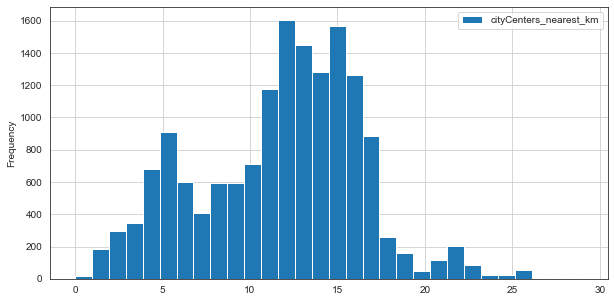

In [59]:
real_estate_sp = real_estate[real_estate['locality_name'] == 'Санкт-Петербург']
real_estate_sp['cityCenters_nearest_km'].plot(kind = 'hist', bins = 30,figsize = (10,5), legend = True, grid = True)

In [60]:
grouped_by_center_dist = real_estate_sp.pivot_table(index = 'cityCenters_nearest_grouped', values = 'price_per_meter', 
aggfunc = ['mean', 'count'])
grouped_by_center_dist.columns = ['Price per meter, mean','Ads, count']
grouped_by_center_dist['Ads, %'] = grouped_by_center_dist['Ads, count'] / grouped_by_center_dist['Ads, count'].sum()*100
grouped_by_center_dist.sort_values(by = 'Price per meter, mean', ascending = False)

,"Price per meter, mean","Ads, count","Ads, %"
cityCenters_nearest_grouped,,,
0 - 5,132459.057787,2440,15.684258
5 - 10,125614.936317,2905,18.673266
10 - 13,107923.876064,4228,27.177476
13 - 15,104240.701791,2847,18.300444
15 - 20,98726.282218,2615,16.809153
20+,91269.051724,522,3.355403


In [61]:
real_estate_sp_corr = real_estate_sp.corr()
real_estate_sp_corr['price_per_meter'].sort_values()

cityCenters_nearest_km     -0.357649
cityCenters_nearest        -0.357158
ponds_nearest              -0.109080
rooms                      -0.028945
month_exposition           -0.018004
airports_nearest           -0.012525
weekday_exposition         -0.001402
open_plan                   0.019456
studio                      0.022623
area_ratio_living_total     0.023172
balcony                     0.032506
parks_nearest               0.034418
year_exposition             0.054410
floors_total                0.062376
days_exposition             0.066276
floor                       0.082408
total_images                0.136559
parks_around3000            0.171409
ponds_around3000            0.198977
total_area                  0.214525
area_ratio_kitchen_total    0.224769
ceiling_height              0.252376
kitchen_area                0.380849
living_area                 0.516106
last_price                  0.650381
last_price_mln              0.650381
price_per_meter             1.000000
p

,price_per_meter,last_price,total_area,living_area,ceiling_height,parks_around3000,ponds_around3000,cityCenters_nearest_km
price_per_meter,1.000000,0.650381,0.214525,0.516106,0.252376,0.171409,0.198977,-0.357649
last_price,0.650381,1.000000,0.815991,0.820009,0.360619,0.197483,0.206341,-0.369276
total_area,0.214525,0.815991,1.000000,0.922032,0.386545,0.169134,0.169296,-0.336288
living_area,0.516106,0.820009,0.922032,1.000000,0.383106,0.121298,0.101822,-0.313724
ceiling_height,0.252376,0.360619,0.386545,0.383106,1.000000,0.227366,0.200363,-0.437996
parks_around3000,0.171409,0.197483,0.169134,0.121298,0.227366,1.000000,0.244145,-0.339978
ponds_around3000,0.198977,0.206341,0.169296,0.101822,0.200363,0.244145,1.000000,-0.237776
cityCenters_nearest_km,-0.357649,-0.369276,-0.336288,-0.313724,-0.437996,-0.339978,-0.237776,1.000000


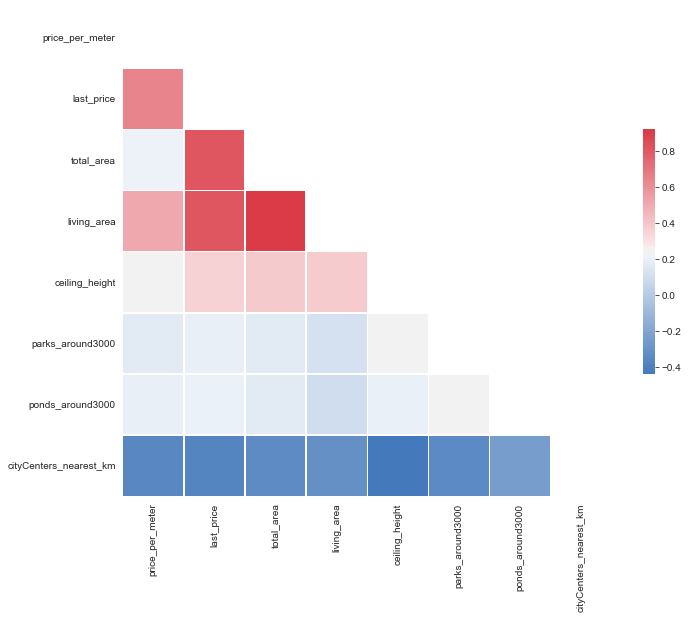

In [62]:
real_estate_sp_corr_grouped = real_estate_sp_corr.loc[
['price_per_meter', 'last_price', 'total_area', 'living_area','ceiling_height', 'parks_around3000', 'ponds_around3000',
 'cityCenters_nearest_km'],
['price_per_meter', 'last_price', 'total_area', 'living_area','ceiling_height', 'parks_around3000', 'ponds_around3000',
 'cityCenters_nearest_km']]
display(real_estate_sp_corr_grouped)
CorrMtx(real_estate_sp_corr_grouped, dropDuplicates = True)

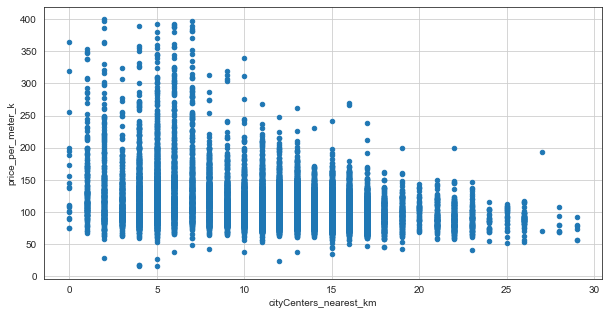

In [63]:
real_estate_sp.plot(x = 'cityCenters_nearest_km', y = 'price_per_meter_k',  
kind = 'scatter', figsize = (10,5), legend = True, grid = True);

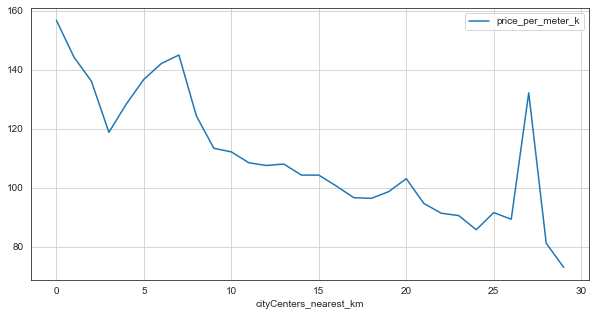

In [64]:
real_estate_sp_km_price = real_estate_sp.pivot_table(index = 'cityCenters_nearest_km', values = 'price_per_meter_k')
real_estate_sp_km_price.plot(kind = 'line', figsize = (10,5), legend = True, grid = True);

Сильный перелом графика находится где-то на уровне 7км. Все объявления, входящие в радиус 7км от центра в последующем буду считать центром.

### Проанализирую сегмент квартир в центре 

In [65]:
real_estate_sp_center = real_estate_sp[real_estate_sp['cityCenters_nearest_km'] <= 7]
real_estate_sp_center

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,weekday_exposition,month_exposition,year_exposition,floor_type,area_ratio_living_total,area_ratio_kitchen_total,last_price_mln,price_per_meter_k,cityCenters_nearest_km,cityCenters_nearest_grouped
24,8,6500000.0,97.20,2015-10-31,2,2.77,3.0,NaN,1,NaN,...,5,10,2015,Первый,NaN,0.201646,6.500,66.872,2.0,0 - 5
35,6,15500000.0,149.00,2017-06-26,5,2.77,5.0,NaN,4,NaN,...,0,6,2017,Другой,NaN,0.114094,15.500,104.026,4.0,0 - 5
51,7,45000000.0,161.00,2017-10-17,3,3.20,8.0,50.0,4,NaN,...,1,10,2017,Другой,0.310559,0.310559,45.000,279.503,7.0,5 - 10
52,20,11795000.0,136.00,2017-09-22,6,3.00,2.0,NaN,2,NaN,...,4,9,2017,Последний,NaN,0.080882,11.795,86.727,7.0,5 - 10
61,18,7990000.0,74.00,2017-08-24,2,2.77,4.0,NaN,4,NaN,...,3,8,2017,Последний,NaN,0.270270,7.990,107.972,4.0,0 - 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23665,11,4250000.0,47.00,2016-05-20,1,2.77,6.0,NaN,1,False,...,4,5,2016,Первый,NaN,0.310638,4.250,90.425,5.0,0 - 5
23681,13,5250000.0,43.00,2018-05-11,2,2.50,5.0,NaN,2,NaN,...,4,5,2018,Другой,NaN,0.139535,5.250,122.093,7.0,5 - 10
23690,3,5500000.0,52.00,2018-07-19,2,2.77,5.0,NaN,2,NaN,...,3,7,2018,Другой,NaN,0.115385,5.500,105.769,6.0,5 - 10
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,NaN,7,NaN,...,3,10,2016,Другой,NaN,0.145405,9.470,129.903,4.0,0 - 5


In [66]:
real_estate_sp_corr = real_estate_sp.corr()
real_estate_sp_center_corr = real_estate_sp_center.corr()
real_estate_sp_center_corr['last_price']
real_estate_sp_corr['last_price']
real_estate_sp_compare2 = real_estate_sp_corr['last_price']
real_estate_sp_compare2 = pd.DataFrame(real_estate_sp_compare2)
real_estate_sp_compare2['Center'] = real_estate_sp_center_corr['last_price']
real_estate_sp_compare2.columns = ['All', 'Center']
real_estate_sp_compare2['Difference'] = real_estate_sp_compare2['Center'] - real_estate_sp_compare2['All']
real_estate_sp_compare2.sort_values(by = 'Center')

,All,Center,Difference
area_ratio_living_total,-0.096958,-0.189967,-9.300909e-02
area_ratio_kitchen_total,-0.140625,-0.132717,7.908559e-03
ponds_nearest,-0.121595,-0.086810,3.478534e-02
parks_nearest,-0.012008,-0.043108,-3.109997e-02
year_exposition,-0.046972,-0.040490,6.482021e-03
studio,-0.041335,-0.039781,1.554073e-03
cityCenters_nearest,-0.370083,-0.032385,3.376980e-01
cityCenters_nearest_km,-0.369276,-0.022462,3.468140e-01
month_exposition,-0.005553,-0.020289,-1.473625e-02
weekday_exposition,-0.000042,0.015529,1.557094e-02


Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

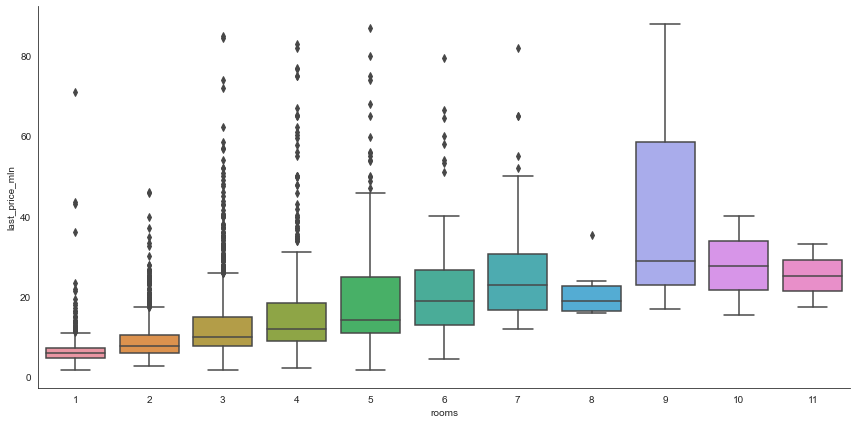

In [67]:
sns.catplot(data = real_estate_sp_center.query('last_price_mln <= 90 & rooms <= 11'), x = 'rooms', y = 'last_price_mln', 
kind = 'box', height = 6, aspect = 2);

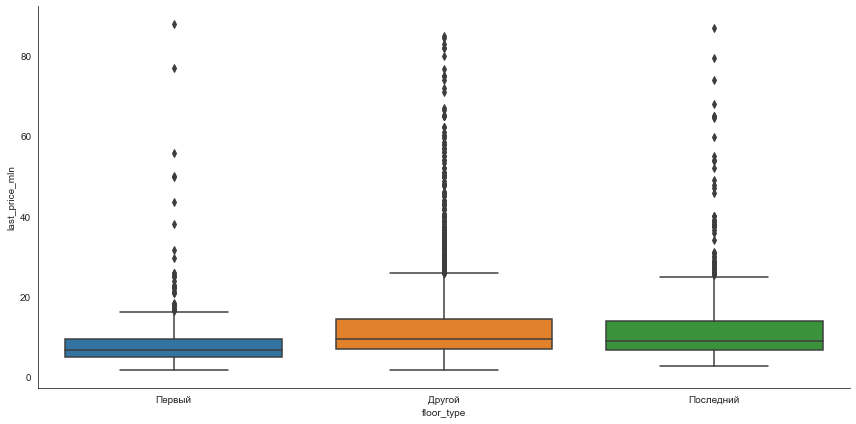

In [68]:
sns.catplot(data = real_estate_sp_center.query('last_price_mln <= 90'), x = 'floor_type', y = 'last_price_mln', 
kind = 'box', height = 6, aspect = 2);

In [69]:
display(real_estate_sp_center.pivot_table(index = 'floor_type', values = 'last_price_mln'))
real_estate_sp.pivot_table(index = 'floor_type', values = 'last_price_mln')

,last_price_mln
floor_type,
Другой,13.052638
Первый,8.841707
Последний,13.368975


,last_price_mln
floor_type,
Другой,7.501111
Первый,6.037184
Последний,8.439072


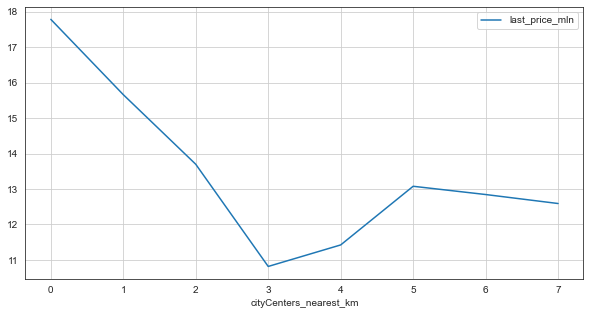

In [70]:
real_estate_sp_km_center_price = real_estate_sp_center.pivot_table(index = 'cityCenters_nearest_km', values = 'last_price_mln')
real_estate_sp_km_center_price.plot(kind = 'line', figsize = (10,5), legend = True, grid = True);

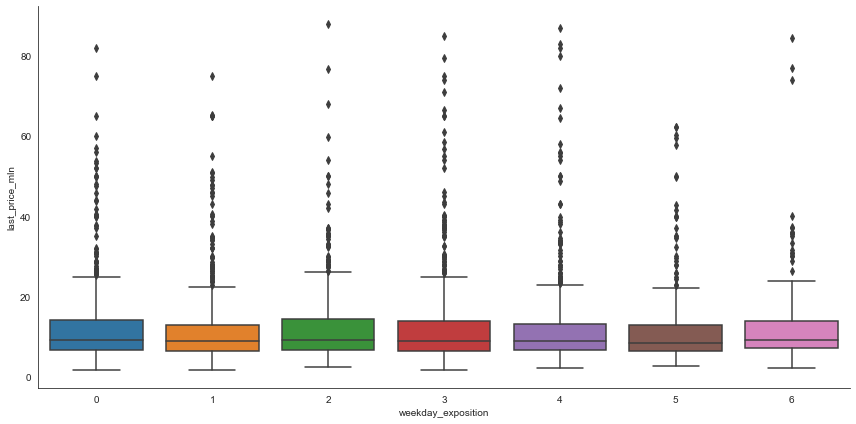

In [71]:
sns.catplot(data = real_estate_sp_center.query('last_price_mln <= 90'), x = 'weekday_exposition', y = 'last_price_mln', 
kind = 'box', height = 6, aspect = 2);

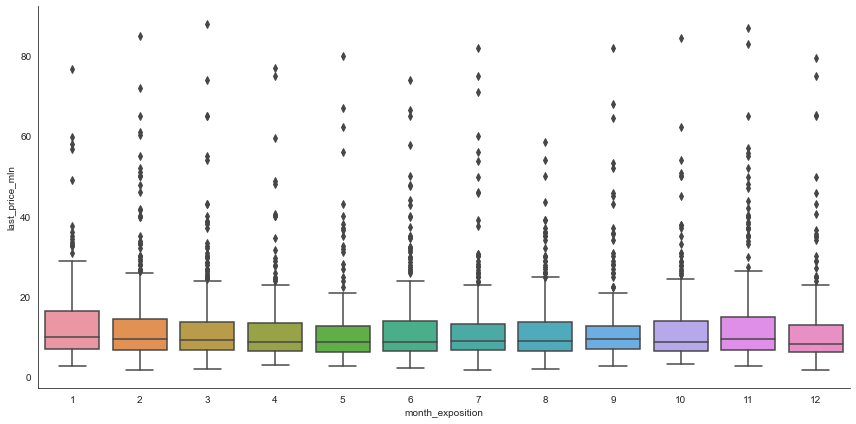

In [72]:
sns.catplot(data = real_estate_sp_center.query('last_price_mln <= 90'), x = 'month_exposition', y = 'last_price_mln', 
kind = 'box', height = 6, aspect = 2);

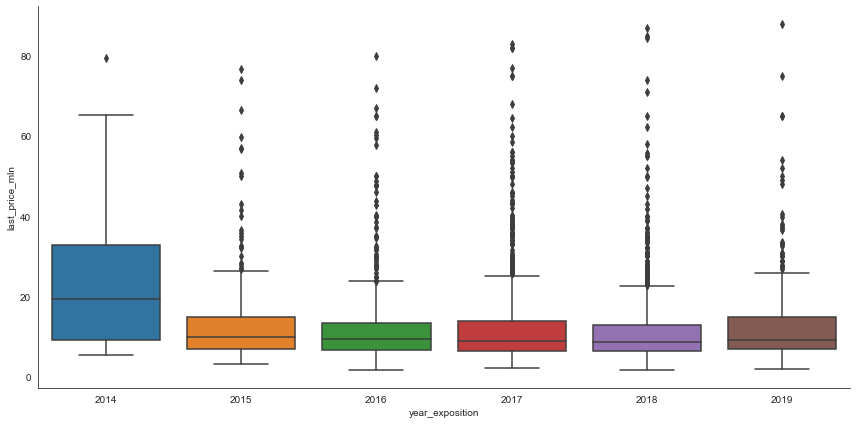

In [73]:
sns.catplot(data = real_estate_sp_center.query('last_price_mln <= 90'), x = 'year_exposition', y = 'last_price_mln', 
kind = 'box', height = 6, aspect = 2);

In [74]:
r1 = real_estate[['last_price_mln', 'price_per_meter_k', 'total_area', 'rooms', 'ceiling_height', 'cityCenters_nearest_km', 
    'parks_around3000', 'ponds_around3000']].describe()
r2 = real_estate_sp[['last_price_mln', 'price_per_meter_k', 'total_area', 'rooms', 'ceiling_height', 'cityCenters_nearest_km', 
    'parks_around3000', 'ponds_around3000']].describe()
r3 = real_estate_sp_center[['last_price_mln', 'price_per_meter_k', 'total_area', 'rooms', 'ceiling_height', 
    'cityCenters_nearest_km', 'parks_around3000', 'ponds_around3000']].describe()
display(r1)
display(r2)
display(r3)

,last_price_mln,price_per_meter_k,total_area,rooms,ceiling_height,cityCenters_nearest_km,parks_around3000,ponds_around3000
count,18078.000000,18078.000000,18078.000000,18078.000000,18078.000000,18077.000000,18078.000000,18078.000000
mean,7.081392,108.551186,62.703389,2.138566,2.749397,14.232284,0.605543,0.764133
std,6.518707,35.358869,36.399528,1.103382,0.207550,8.611593,0.797259,0.932835
min,1.190000,15.345000,12.000000,1.000000,2.300000,0.000000,0.000000,0.000000
25%,4.000000,87.378000,41.100000,1.000000,2.600000,9.000000,0.000000,0.000000
50%,5.250000,101.562000,54.000000,2.000000,2.770000,13.000000,0.000000,0.000000
75%,7.600000,120.567000,72.700000,3.000000,2.770000,16.000000,1.000000,1.000000
max,140.000000,399.804000,631.200000,19.000000,3.980000,66.000000,3.000000,3.000000


,last_price_mln,price_per_meter_k,total_area,rooms,ceiling_height,cityCenters_nearest_km,parks_around3000,ponds_around3000
count,15557.000000,15557.000000,15557.000000,15557.000000,15557.000000,15557.000000,15557.000000,15557.000000
mean,7.464384,112.296625,63.899512,2.169699,2.757297,11.634055,0.620878,0.763322
std,6.852981,35.795913,37.592160,1.125455,0.212842,4.844574,0.782208,0.917970
min,1.190000,15.345000,12.000000,1.000000,2.300000,0.000000,0.000000,0.000000
25%,4.200000,90.909000,41.900000,1.000000,2.600000,8.000000,0.000000,0.000000
50%,5.500000,104.545000,55.000000,2.000000,2.770000,12.000000,0.000000,1.000000
75%,8.000000,123.913000,74.000000,3.000000,2.770000,15.000000,1.000000,1.000000
max,140.000000,399.804000,631.200000,19.000000,3.980000,29.000000,3.000000,3.000000


,last_price_mln,price_per_meter_k,total_area,rooms,ceiling_height,cityCenters_nearest_km,parks_around3000,ponds_around3000
count,3445.000000,3445.000000,3445.000000,3445.000000,3445.000000,3445.000000,3445.000000,3445.000000
mean,12.641629,135.597615,90.716041,2.819158,2.950369,4.510015,1.021190,1.279536
std,11.483760,54.572625,54.906932,1.430579,0.283935,1.666339,0.937577,1.084658
min,1.600000,15.345000,12.000000,1.000000,2.400000,0.000000,0.000000,0.000000
25%,6.600000,99.467000,56.400000,2.000000,2.770000,4.000000,0.000000,0.000000
50%,9.000000,122.341000,77.900000,3.000000,2.800000,5.000000,1.000000,1.000000
75%,13.900000,153.163000,108.000000,3.000000,3.100000,6.000000,2.000000,2.000000
max,140.000000,399.804000,631.200000,19.000000,3.980000,7.000000,3.000000,3.000000


Количество комнат имеет довольно сильное влияние на стоимость, как в центре, так и во всем городе (коэфф корреляции 0,44 и 0,51 соответственно). Стоимость квартир на первом этаже в городе гораздо ниже, чем на других этажах (на 25%), причем в центре города это играет большую роль (ниже на 34%). Удаленность от центра играет значительную роль в цене, самая дорогая недвижимость в пределах 7ми километров от центра, далее цена начинает постепенно снижаться. Дата размещения практически не влияет на стоимость.

### Вывод

В ходе исследования объявлений о продаже квартир были изучены полученные данные, обработаны и заполнены пропуски в тех местах, где это можно было сделать, исключены "выбросы" и изучены влияния различных факторов на цену недвижимости в Санкт-Петербурге и его центре.

Больше всего объявлений размещены на недвижимость площадью от 40 до 70 м2. Последняя цена большинства объявлений от 4 до 7,6 млн. руб. Средняя стоимость квадратного метра 108тыс.руб., большинство значений расположены в интервале от 87 до 120 тысяч рублей. Больше всего объявлений на однокомнатные и двухкомнатные квартиры, ненамного меньше объявлений на трехкомнатные квартиры (~20%). 2,7м - средняя высота потолков.

Среднее время размещения объявления - 180 дней. Очень быстрой продажей можно считать продажу в течении 45 дней, необычно долгой свыше 230 дней.

Наибольшая корреляция, это корреляция цены с площадью и жилой площадью (0,81 и 0,79 соответственно). Количество комнат имеет довольно сильное влияние на стоимость, как в центре, так и во всем городе (коэфф корреляции 0,44 и 0,51 соответственно). Корреляция между ценой и удалённостью от центра отрицательна и составила. Стоимость квартир на первом этаже гораздо ниже, чем на других этажах (на 25%), причем в центре города это играет большую роль (ниже на 34%). Удаленность от центра играет значительную роль в цене, самая дорогая недвижимость в пределах 7ми километров от центра, далее цена начинает постепенно снижаться. Дата размещения практически не влияет на стоимость.

Санкт-Петербург - населенный пункт с самой высокой стоимостью жилья (112тысяч руб. за квадратный метр), а Красное Село с самой низкой стоимостью (72тысячи руб. за квадратный метр).

Средняя стоимость жилья по всем данным - 7 млн. руб., в Санкт-Петербурге - 7,5 млн. руб., в в центре Санкт-Петербурга - 12,64 млн. руб. Похожим образом и меняется цена за квадратный метр: 108 тысяч за кв. метр - по всем данным, 112 тысяч в Санкт-Петербурге и 135 тысяч в его центре. Площадь недвижимости в центре Санкт-Петербурга в среднем на 30% больше, чем в остальных местах (90м2 и 63м2 соответсвенно). Высота потолков у недвижимости в центре Санкт-Петербурга выше на 20см по сравнению с остальной недвижимостью (2,95м и 2,75м соответсвенно).
